***Objective***

The goal of this analysis is to build a predictive model to estimate the 10-year risk of coronary heart disease (CHD) based on patient demographic and health data. By applying machine learning techniques, the aim is to uncover key risk factors and provide actionable insights to support early detection and prevention of CHD.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/Heart_dataset.csv')  #  load File
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

In [ ]:
df.info()  # Columns  datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df = df.drop(columns=['education'])

In [ ]:
df.describe()  # Summary statistics

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Data Preprocessing

In [ ]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


Fill Missing Values

In [ ]:
# Define the binary columns
bin_cols = ["male", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]

# Fill missing values for binary features with the most frequent value (mode)
for col in bin_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Check if there are any remaining missing values
missing_values = df.isnull().sum()

<ipython-input-9-564253c0296b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-9-564253c0296b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [ ]:
# Fill missing values for numeric features
numeric_cols = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


# Check if there are any remaining missing values
missing_values = df.isnull().sum()

<ipython-input-10-fc3a55fa0f71>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


**EDA**

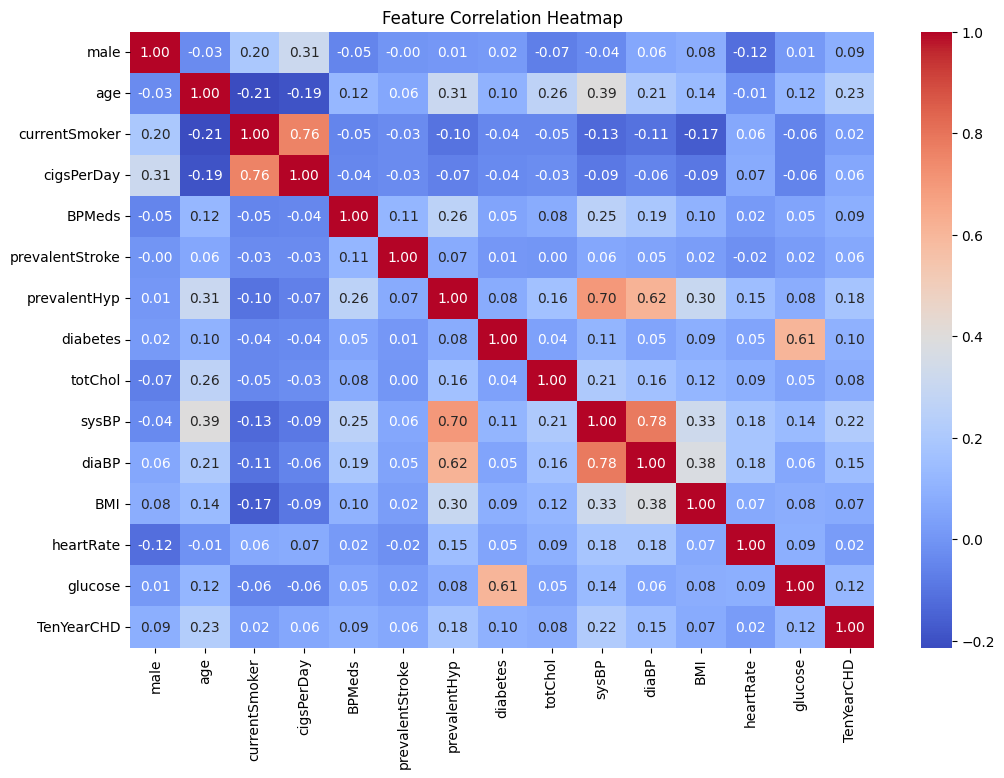

In [ ]:
# What relationships can be observed between different features in the dataset, and how might these correlations help in understanding heart disease risk factors?
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap reveals strong correlations between smoking habits, blood pressure, diabetes, and glucose levels, highlighting key risk factors for heart disease.

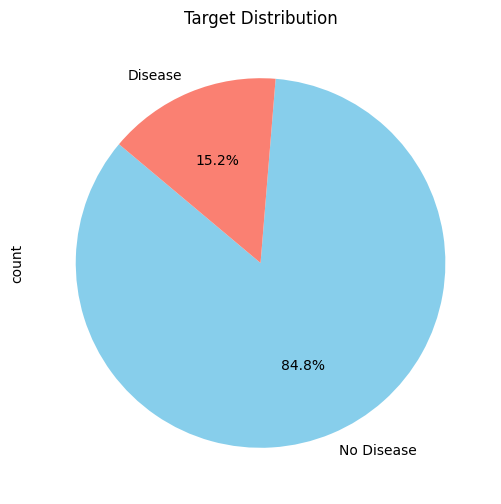

In [ ]:
# What does the target distribution reveal about the proportion of individuals with and without heart disease in the dataset?
df["TenYearCHD"].value_counts().plot.pie(
    labels=["No Disease", "Disease"],
    autopct='%1.1f%%',
    colors=["skyblue", "salmon"],
    startangle=140,
    figsize=(6, 6),
    title="Target Distribution"
)
plt.show()

 The target distribution reveals that 15.2% of individuals have heart disease, while 84.8% do not.

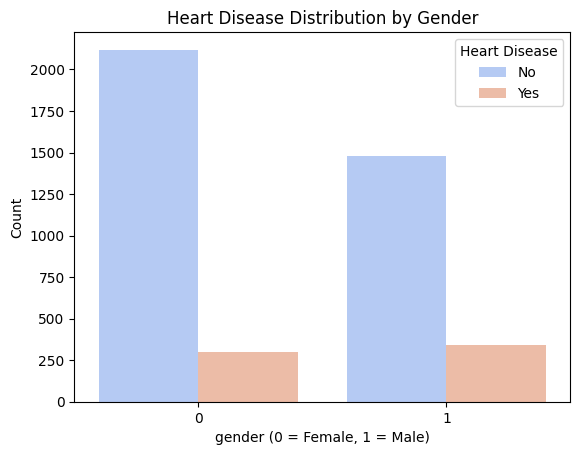

In [ ]:
# What does the gender distribution reveal about the risk of heart disease in males and females?
sns.countplot(x="male", hue="TenYearCHD", data=df, palette="coolwarm")
plt.title("Heart Disease Distribution by Gender")
plt.xlabel("gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

The gender distribution suggests that males have a higher risk of heart disease compared to females in the dataset.

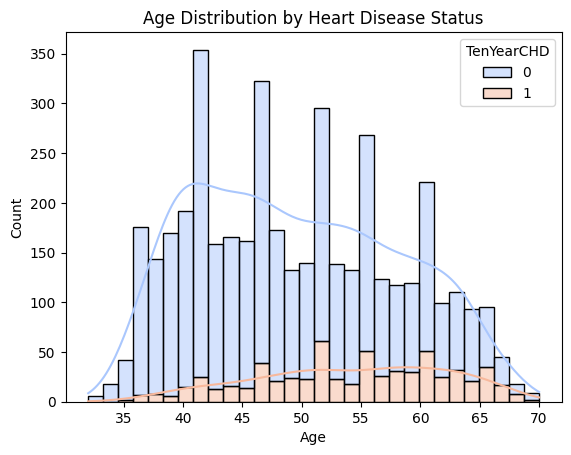

In [ ]:
# What patterns are seen in the age distribution of people with and without heart disease, and how does age affect the risk of heart disease?
sns.histplot(df, x="age", hue="TenYearCHD", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

 Heart disease risk rises with age, with more cases seen in older individuals.

In [ ]:
# Average Cholesterol Levels for Patients vs Non-Patients
print("Average Cholesterol Levels:\n", df.groupby('TenYearCHD')['totChol'].mean())

Average Cholesterol Levels:
 TenYearCHD
0    235.134316
1    245.229814
Name: totChol, dtype: float64


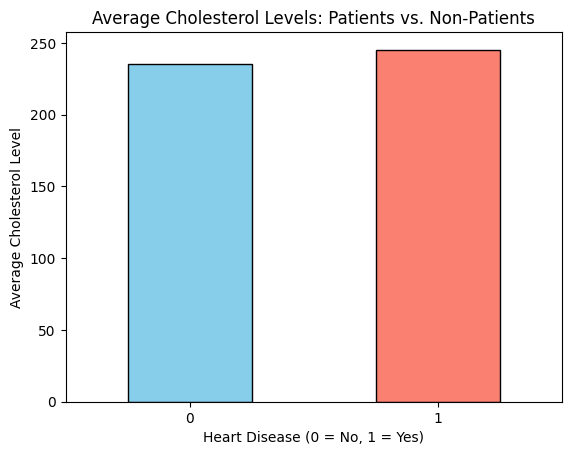

In [ ]:
# Average Cholesterol Levels Visualization
df.groupby('TenYearCHD')['totChol'].mean().plot(
    kind='bar', color=['skyblue', 'salmon'], edgecolor='black', title='Average Cholesterol Levels: Patients vs. Non-Patients'
)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Average Cholesterol Level')
plt.xticks(rotation=0)
plt.show()

Patients with heart disease have higher average cholesterol levels (245.23) compared to non-patients (235.13).

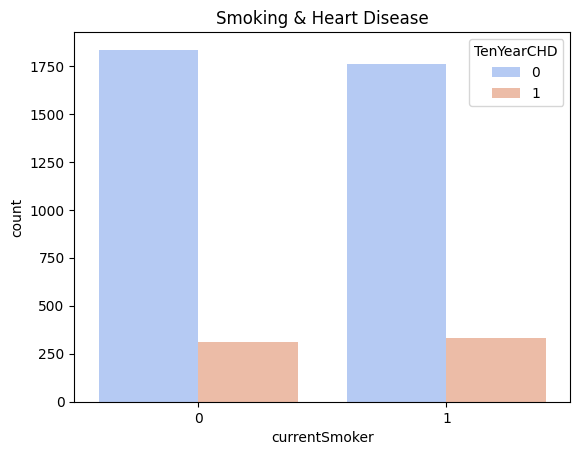

In [ ]:
# Does smoking increase the risk of heart disease?
sns.countplot(x="currentSmoker", hue="TenYearCHD", data=df, palette="coolwarm")
plt.title("Smoking & Heart Disease")
plt.show()

Yes, the plot indicates that current smokers have a higher proportion of heart disease cases, suggesting smoking increases the risk.

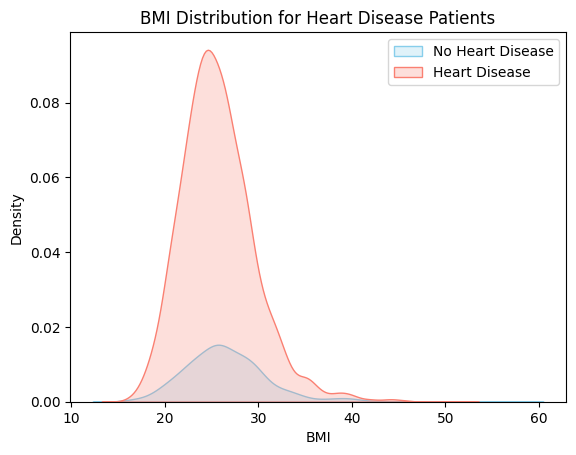

In [ ]:
# How does the BMI distribution differ between heart disease and non-heart disease patients, and what might it suggest about their lifestyle habits?

sns.kdeplot(data=df, x='BMI', hue='TenYearCHD', fill=True, palette=['salmon', 'skyblue'])
plt.title('BMI Distribution for Heart Disease Patients')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
plt.show()

 Higher BMI values, particularly between 20-30, are associated with an increased risk of heart disease

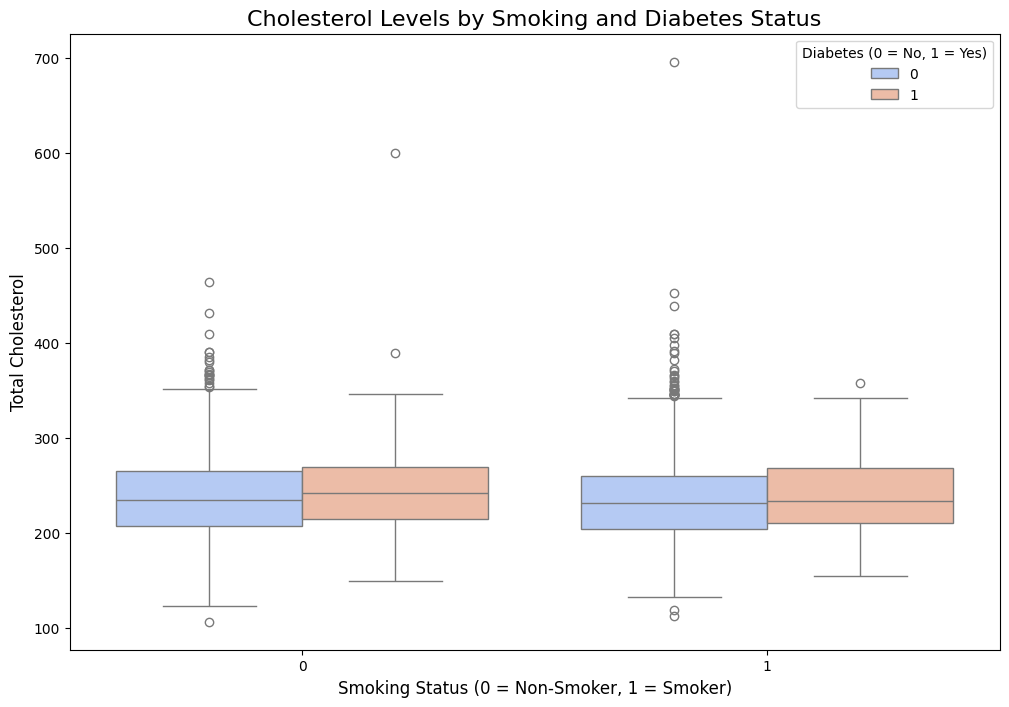

In [ ]:
# What is the relationship between smoking, diabetes, and cholesterol levels?
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='currentSmoker', y='totChol', hue='diabetes', palette='coolwarm')
plt.title('Cholesterol Levels by Smoking and Diabetes Status', fontsize=16)
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=12)
plt.ylabel('Total Cholesterol', fontsize=12)
plt.legend(title='Diabetes (0 = No, 1 = Yes)')
plt.show()

Smokers, especially those with diabetes, have higher cholesterol levels compared to non-smokers.

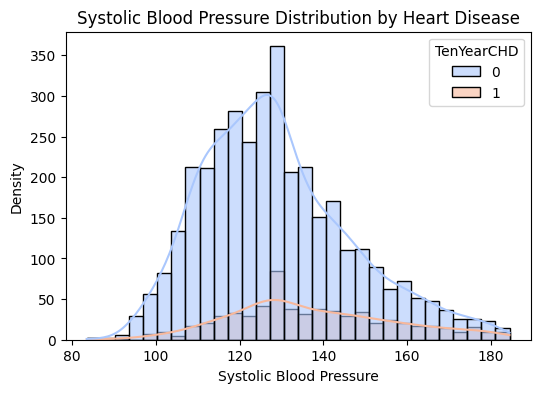

In [ ]:
# What does the systolic blood pressure distribution reveal about the likelihood of developing heart disease over ten years?
# Are there specific systolic blood pressure ranges that indicate a higher risk of heart disease?

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='sysBP', hue='TenYearCHD', bins=30, kde=True, palette='coolwarm', alpha=0.6)
plt.title('Systolic Blood Pressure Distribution by Heart Disease')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Density')
plt.show()

Systolic blood pressure in the 120-140 range is associated with a higher risk of heart disease.

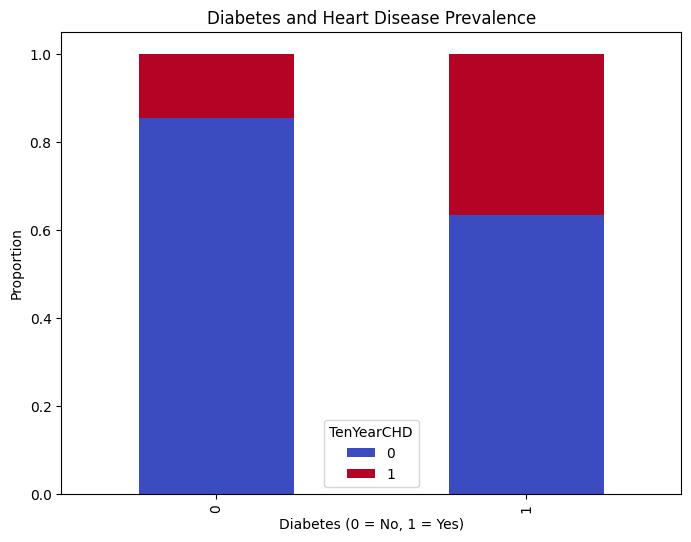

In [ ]:
# How does the prevalence of heart disease vary among diabetic and non-diabetic patients?
df.groupby('diabetes')['TenYearCHD'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 6)
)
plt.title('Diabetes and Heart Disease Prevalence')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.show()


<!-- Diabetic patients have a higher prevalence of heart disease compared to non-diabetic patients.diabetes is strongly associated with a higher risk of heart disease. or yeh -->

Diabetic patients have a higher prevalence of heart disease compared to non-diabetic patients.diabetes is strongly associated with a higher risk of heart disease.










<!-- diabetes is strongly associated with a higher risk of heart disease.  -->

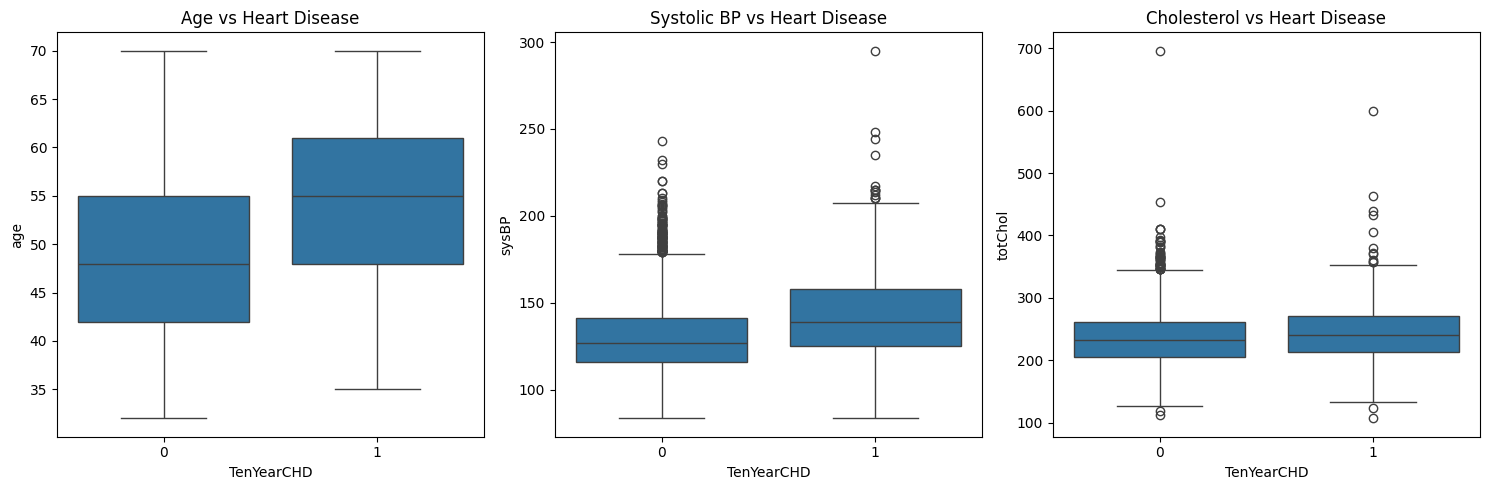

In [ ]:
# Key Feature Analysis (How Age, BP, Cholesterol Affect Heart Disease)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='TenYearCHD', y='age', data=df, ax=axes[0])
axes[0].set_title("Age vs Heart Disease")

sns.boxplot(x='TenYearCHD', y='sysBP', data=df, ax=axes[1])
axes[1].set_title("Systolic BP vs Heart Disease")

sns.boxplot(x='TenYearCHD', y='totChol', data=df, ax=axes[2])
axes[2].set_title("Cholesterol vs Heart Disease")

plt.tight_layout()
plt.show()

Higher age, systolic blood pressure, and cholesterol levels are associated with a higher likelihood of heart disease, indicating they are key risk factors.

In [ ]:
#  Percentage of high-risk patients in age and gender categories
high_risk = df[df['TenYearCHD'] == 1]
risk_by_age_gender = high_risk.groupby(['age', 'male']).size().unstack(fill_value=0)
print("High-Risk Patients by Age and Gender:\n", risk_by_age_gender)

High-Risk Patients by Age and Gender:
 male   0   1
age         
35     1   1
36     1   2
37     1   3
38     2   6
39     2   4
40     9   6
41     3   8
42     5   9
43     5   8
44     6  10
45     6   8
46    11   5
47    11  12
48     7  14
49    10  14
50     6  17
51     8  21
52    13  19
53    15   8
54     4  14
55    16   8
56    11  16
57    14  12
58    16  15
59    18  12
60    10  16
61    14  11
62    10  15
63    20  12
64    12   9
65    12   8
66    10   5
67     9   8
68     2   6
69     0   1
70     1   0


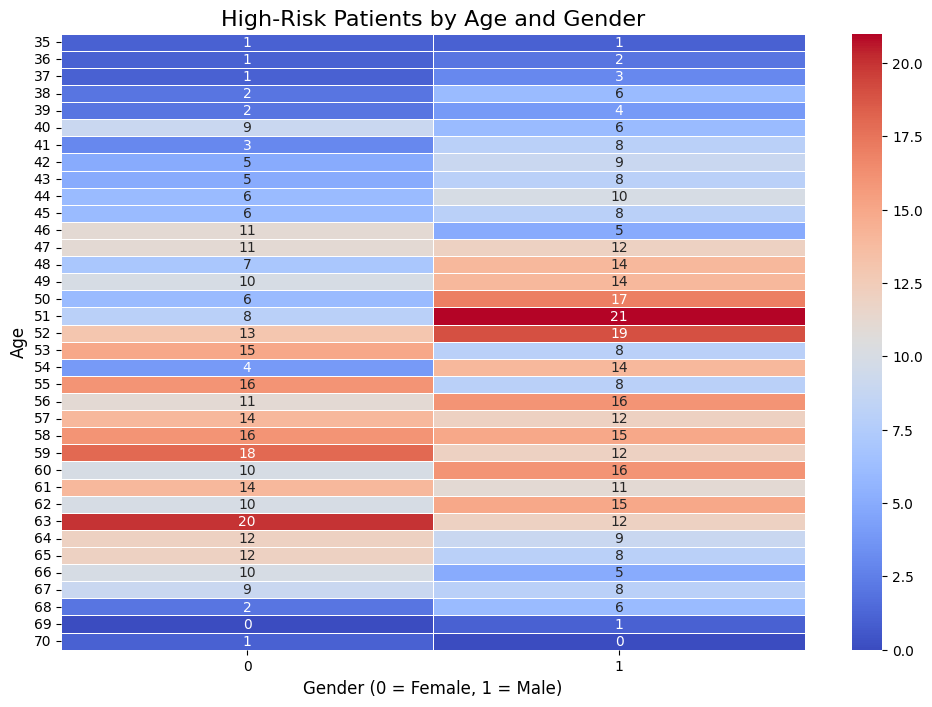

In [ ]:
# Visualizing high-risk patients by age and gender using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(risk_by_age_gender, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title('High-Risk Patients by Age and Gender', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Between ages 46 and 62, both males and females show an increase in the number of high-risk patients, with males generally having higher values than females.

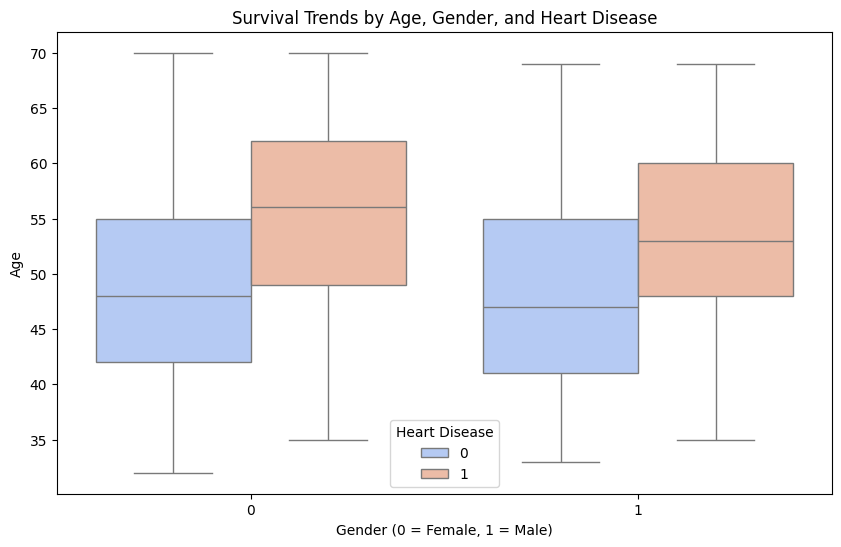

In [ ]:
#Survival trends by age, gender, and risk factors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='male', y='age', hue='TenYearCHD', palette='coolwarm')
plt.title('Survival Trends by Age, Gender, and Heart Disease')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.legend(title='Heart Disease')
plt.show()

The boxplot reveals that, on average, males are diagnosed with heart disease at a younger age compared to females. It also shows that both genders experience a higher incidence of heart disease as age increases, with males having a slightly higher risk at earlier ages.

In [ ]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['TenYearCHD'] == 0]
df_minority = df[df['TenYearCHD'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # To match majority class
                                 random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_balanced['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,3596


Scaling (StandardScale)

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Test Split and Feature Scalling

In [ ]:
#  from sklearn.model_selection import train_test_split
#  from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df_balanced.drop(columns=['TenYearCHD'])
y = df_balanced['TenYearCHD']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)



In [ ]:
#  Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[611 124]
 [  3 701]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       735
           1       0.85      1.00      0.92       704

    accuracy                           0.91      1439
   macro avg       0.92      0.91      0.91      1439
weighted avg       0.92      0.91      0.91      1439


Accuracy Score:
 0.9117442668519805


In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': decision_tree.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
            Feature  Importance
1               age    0.171830
11              BMI    0.148803
13          glucose    0.121175
9             sysBP    0.120222
8           totChol    0.116760
10            diaBP    0.103615
12        heartRate    0.103383
3        cigsPerDay    0.050509
6      prevalentHyp    0.029039
0              male    0.019569
5   prevalentStroke    0.004166
7          diabetes    0.003752
2     currentSmoker    0.003625
4            BPMeds    0.003551


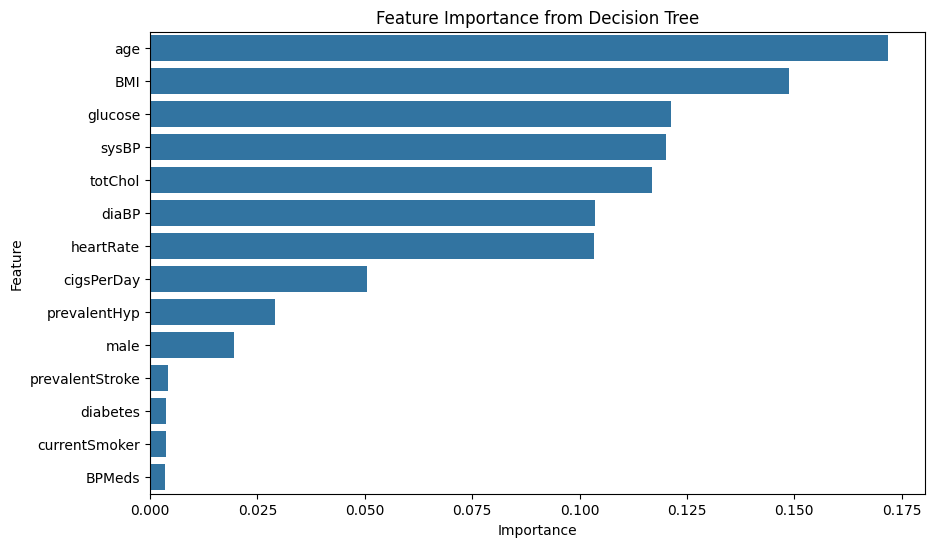

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance from Decision Tree")
plt.show()

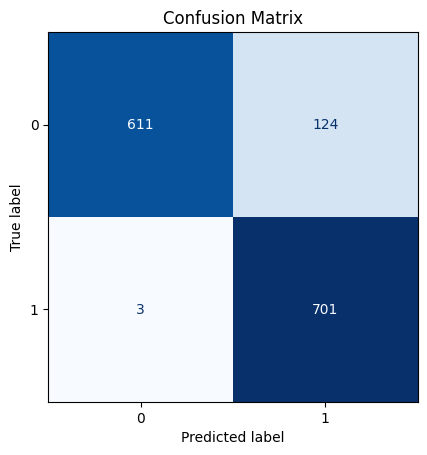

In [ ]:
# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

ROC curve plot karo to visualize model performance.

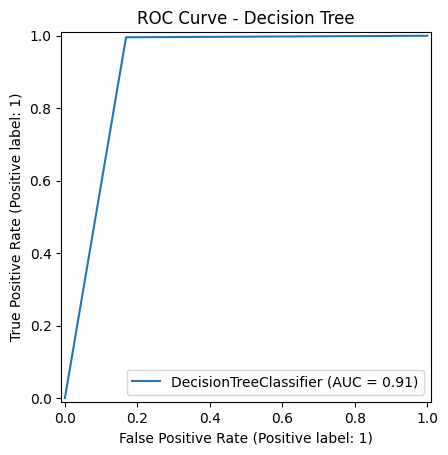

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC Curve
RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()

***Conclusion***


The model achieved an accuracy of 91.17%, effectively predicting the 10-year risk of coronary heart disease. Key factors influencing CHD risk include age, systolic blood pressure, and cholesterol levels. The results emphasize the importance of early detection and preventive measures to manage heart disease risk.